# General Comments about the data set
This table provides the volume of violent crime (murder and nonnegligent manslaughter, rape, robbery, and aggravated assault) and property crime (burglary, larceny-theft, and motor vehicle theft) as reported by city and town law enforcement agencies (listed alphabetically by state) that contributed data to the UCR Program. (Note:  Arson is not included in the property crime total in this table; however, if complete arson data were provided, they will appear in the arson column.)

Population estimation
For the 2013 population estimates used in this table, the FBI computed individual rates of growth from one year to the next for every city/town and county using 2010 decennial population counts and 2011 through 2012 population estimates from the U.S. Census Bureau. Each agency’s rates of growth were averaged; that average was then applied and added to its 2012 Census population estimate to derive the agency’s 2013 population estimate.

 

# Instructions

Here let's work on regression. Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. Submit a link to your notebook below.

In [93]:
# import all the modules I need
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', None)
%matplotlib inline
import seaborn as sns
import math
from sklearn import linear_model
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy",
                        message="^internal gelsd")


# import in the data table I downloaded from UCR
df = pd.DataFrame()
df = pd.read_excel(
    "table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls", sheet_name='13tbl8ny')

Need to clean by:
- fixing headers (line 3) and deleting rows 0-2
- dropping Rape\n(revised\ndefinition)1 column 
- filling in NaN with 0


Need to create features by:
- changing categorical variables to 0 and 1

In [94]:
df.drop(['Unnamed: 4', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'], axis=1, inplace=True)

In [95]:
df.columns = df.loc[3].values

In [96]:
df.drop([0, 1,2, 3, 352, 353, 354], inplace=True)

In [97]:
# rename and change the data type to be numerical instead of an object
df['Population'] = df['Population'].astype(int)

df['Violent_crime'] = df['Violent\ncrime']
df['Violent_crime'] = df['Violent_crime'].astype(int)
df['Violent_crime'] = df['Violent_crime'].apply(lambda x: (x > 0)*1)

df['Murder'] = df['Murder and\nnonnegligent\nmanslaughter']
df['Murder'] = df['Murder'].astype(
    int)
df['Murder01'] = df['Murder'].apply(
    lambda x: (x > 0)*1)

df['Rape'] = df['Rape\n(legacy\ndefinition)2']
df['Rape'] = df['Rape'].astype(int)
df['Rape'] = df['Rape'].apply(lambda x: (x > 0)*1)

df['Robbery'] = df['Robbery'].astype(int)
df['Robbery'] = df['Robbery'].apply(lambda x: (x > 0)*1)

df['Aggravated_assault'] = df['Aggravated\nassault']
df['Aggravated_assault'] = df['Aggravated_assault'].astype(int)
df['Aggravated_assault'] = df['Aggravated_assault'].apply(lambda x: (x > 0)*1)

df['Property\ncrime'] = df['Property\ncrime'].astype(int)
df['Property_crime'] = df['Property\ncrime']

df['Burglary'] = df['Burglary'].astype(int)
df['Burglary'] = df['Burglary'].apply(lambda x: (x > 0)*1)

#df.drop(['Violent\ncrime', 'Murder and\nnonnegligent\nmanslaughter',
         #'Rape\n(legacy\ndefinition)2',  'Aggravated\nassault', 'Property\ncrime'], axis=1, inplace=True)
df

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Violent_crime,Murder,Murder01,Rape,Aggravated_assault,Property_crime
4,Adams Village,1861,0,0,0,0,0,12,1,0,0,0,0,0,12
5,Addison Town and Village,2577,3,0,0,0,3,24,1,1,0,0,0,1,24
6,Akron Village,2846,3,0,0,0,3,16,1,1,0,0,0,1,16
7,Albany,97956,791,8,30,1,526,4090,1,1,8,1,1,1,4090
8,Albion Village,6388,23,0,3,1,16,223,1,1,0,0,1,1,223
9,Alfred Village,4089,5,0,0,1,2,46,1,1,0,0,0,1,46
10,Allegany Village,1781,3,0,0,0,3,10,0,1,0,0,0,1,10
11,Amherst Town,118296,107,1,7,1,68,2118,1,1,1,1,1,1,2118
12,Amityville Village,9519,9,0,2,1,3,210,1,1,0,0,1,1,210
13,Amsterdam,18182,30,0,0,1,18,405,1,1,0,0,0,1,405


In [98]:
regr = linear_model.LinearRegression()
regr.fit(df[['Population', 'Murder01', 'Robbery', 'Violent_crime', 'Rape', 'Aggravated_assault']], df['Property_crime'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
regr.coef_

array([ 1.68692040e-02,  5.47150945e+02,  6.17702537e+01, -1.02095553e+02,
        1.54754866e+02,  6.71639565e+01])

In [99]:
regr.score(df[['Population', 'Murder01', 'Robbery', 'Violent_crime', 'Rape', 'Aggravated_assault']], df['Property_crime'])

0.9935209498254765

In [100]:
regr = linear_model.LinearRegression()
X =df[['Population', 'Murder01', 'Robbery', 'Violent_crime', 'Rape', 'Aggravated_assault']].values
N = np.random.randn(X.shape[0], 10)
X = np.concatenate((X, N), axis=1)
regr.fit(X, df['Property_crime'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [101]:
regr.score(X, df['Property_crime'])

0.9937503763405845

Now, let's use the new linear regression code that I learned in this lesson to refit the model and check params, pvalues, and the rsquared value for NY

In [86]:
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [104]:
# Re-fit the model here.
linear_formula = 'Property_crime ~ Population + Murder01'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df).fit()
print(lm.params)
print(lm.pvalues)
print(lm.rsquared)
print(lm.conf_int())

data = df[['Population'] + ['Murder01']]
from sklearn.metrics import confusion_matrix
print(confusion_matrix(df['Property_crime'], df['Murder01']))

Intercept     24.873
Population     0.017
Murder01     654.243
dtype: float64
Intercept    0.491
Population   0.000
Murder01     0.000
dtype: float64
0.9934062182812436
                 0       1
Intercept  -46.097  95.844
Population   0.017   0.017
Murder01   462.613 845.873
[[6 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


Now, let's make a KNN model:

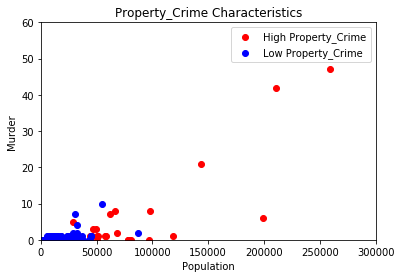

In [139]:
# Look at our data.
plt.scatter(
    df[df['Property_crime'] >= 1000].Population,
    df[df['Property_crime'] >= 1000].Murder,
    color='red'
)
plt.scatter(
    df[df['Property_crime'] <= 1000].Population,
    df[df['Property_crime'] <= 1000].Murder,
    color='blue'
)
plt.xlim(left = 0, right=300000)
plt.ylim(ymin=0, ymax=60)
plt.legend(['High Property_Crime', 'Low Property_Crime'])
plt.title('Property_Crime Characteristics')
plt.xlabel('Population')
plt.ylabel('Murder')
plt.show()

In [133]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=347)
X = df[['Population', 'Property_crime']]
Y = df.Murder
neighbors.fit(X,Y)

## Predict for a town with  population  of 1700 that had 20 property crimes
print(neighbors.predict([[1700, 20]]))
print(neighbors.predict_proba([[1700, 20]]))

[0]
[[0.86167147 0.08933718 0.01152738 0.00576369 0.00288184 0.00288184
  0.00288184 0.00576369 0.00576369 0.00288184 0.00288184 0.00288184
  0.00288184 0.        ]]


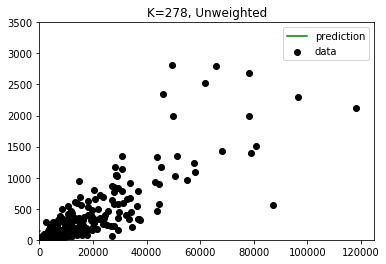

In [134]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=278)
X = pd.DataFrame(df.Population)
Y = df.Property_crime
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.xlim(left = 0, right=125000)
plt.ylim(ymin=0, ymax=3500)
plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=278, Unweighted')
plt.show()

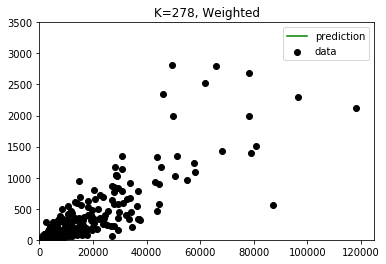

In [135]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=278, weights='distance')
X = pd.DataFrame(df.Population)
Y = df.Property_crime
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.xlim(left = 0, right=125000)
plt.ylim(ymin=0, ymax=3500)
plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=278, Weighted')
plt.show()

In [136]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.1f (+/- %0.1f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.1f (+/- %0.1f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -1.5 (+/- 3.8)
Weighted Accuracy: 0.3 (+/- 0.5)


I favor the OLS regression model over the KNN models because both the categorical and regressional KNN models gave lox accuracy results and the graphs were not as meaningful.

For all of the models, I can see a trend of increasing population leads to increasing porperty_crime, but cannot determine much from the KNN ones because I cannot see the prediction line since there is too much noise and the rows of data are not independent of each other. (so there's perhaps more conditional patterns than I anticipated). Additionally, I can only view 2 parameters at a tiome with KNN, but can look at more with the OLS.

If I was only interested in Murder and it's affects on population and property crime, then mayeb my answer would change. 

The thing about the data that makes the OLS regression perform better is that it is not similar to one another, and much of the data clusters close to 0 (whereas KNN looks at similarity. There might be too much similarity between high and low property crimes to tell much of a prediction) 